# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)
Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

**Do not upload the database file. Only two files are expected**[-20 points]


## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load titanic.scv dataset from sklearn datasets. [1 points]
* Select best 3 attributes for training and testing your model. [2 points]
* Find the best K using elbow method. Explain what other ways can we use to find the best value of K. [3 points]
* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[6 points]
* Plot the classifier in a 2D projection.[3 points]

## Load titanic.scv dataset from sklearn datasets. [1 points]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("titanic.csv")
data.head()


Survived  Pclass  ... Cabin Embarked
0         0       3  ...   NaN        S
1         1       1  ...   C85        C
2         1       3  ...   NaN        S
3         1       1  ...  C123        S
4         0       3  ...   NaN        S

[5 rows x 11 columns]

## Select best 3 attributes for training and testing your model. [2 points]
- choose age, fare, and sex

In [ ]:
data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch', 'Pclass'], axis=1)
data.head()

Survived     Sex   Age     Fare
0         0    male  22.0   7.2500
1         1  female  38.0  71.2833
2         1  female  26.0   7.9250
3         1  female  35.0  53.1000
4         0    male  35.0   8.0500

In [ ]:
# # https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
# # Convert Categorical Values to Binary
# categorical_features = ['Survived', 'Pclass', 'Sex']
# continuous_features = ['Age', 'Fare']
# for col in categorical_features:
#     dummies = pd.get_dummies(data[col], prefix=col)
#     data = pd.concat([data, dummies], axis=1)
#     data.drop(col, axis=1, inplace=True)
# data.head()

In [ ]:
# https://www.youtube.com/watch?v=fyHaUMX9y0A
# Convert Categorical Values to Binary
# Convert male to 1 and female to 0
dummy = pd.get_dummies(data["Sex"])
print(dummy.head())
data = pd.concat((data, dummy), axis=1)
print(data.head())
data = data.drop(["Sex"], axis=1)
print(data.head())
data = data.drop(["female"], axis=1)
print(data.head())
data = data.rename(columns={"male": "Sex"})
print(data.head())

   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1
   Survived     Sex   Age     Fare  female  male
0         0    male  22.0   7.2500       0     1
1         1  female  38.0  71.2833       1     0
2         1  female  26.0   7.9250       1     0
3         1  female  35.0  53.1000       1     0
4         0    male  35.0   8.0500       0     1
   Survived   Age     Fare  female  male
0         0  22.0   7.2500       0     1
1         1  38.0  71.2833       1     0
2         1  26.0   7.9250       1     0
3         1  35.0  53.1000       1     0
4         0  35.0   8.0500       0     1
   Survived   Age     Fare  male
0         0  22.0   7.2500     1
1         1  38.0  71.2833     0
2         1  26.0   7.9250     0
3         1  35.0  53.1000     0
4         0  35.0   8.0500     1
   Survived   Age     Fare  Sex
0         0  22.0   7.2500    1
1         1  38.0  71.2833    0
2         1  26.0   7.9250    0
3         1  35.0  53.1000    0
4     

In [ ]:
# remove nan in Age attribute
# https://www.codegrepper.com/code-examples/python/how+to+remove+nan+values+in+pandas+dataframe
data = data[data['Age'].notna()]
data.head()

Survived   Age     Fare  Sex
0         0  22.0   7.2500    1
1         1  38.0  71.2833    0
2         1  26.0   7.9250    0
3         1  35.0  53.1000    0
4         0  35.0   8.0500    1

## Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

In [ ]:
# https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=66335932
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://www.aionlinecourse.com/tutorial/machine-learning/k-nearest-neighbor
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Survived'])
y = data['Survived']
print("Before split the dataset")
print(X.shape)
# Standardise the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# Split your dataset 75% for training, and 25% for testing the classifier
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=100)
print("After split the dataset")
print(x_train.shape)
print(x_test.shape)

Before split the dataset
(714, 3)
After split the dataset
(535, 3)
(179, 3)


## Find the best K using elbow method. Explain what other ways can we use to find the best value of K. [3 points]
- The most important step in k-Nearest Neigborhood supervised machine learning is to determine the optimal value of K. The elbow method is one of the most popular methods to determine this optimal value of K. Other popular method we can use is CROSS VAALIDATION. We can use K-Fold Cross Validation technique to determine the optimal value of K. First we need to divide the train dataset into K folds and we can use k-1 folds to train the data and 1 fold for cross validation to determine the best value of K and.      



In [ ]:
# https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
# https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7

from sklearn.neighbors import KNeighborsClassifier 
import numpy as np 
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1 if error_rate.index(min(error_rate)) % 2 == 0 else error_rate.index(min(error_rate)))

# print("Minimum error:-",min(error_rate),"at K =",(error_rate.index((min(error_rate))))*2+1)

Minimum error:- 0.21787709497206703 at K = 5


## Plot the Error rate vs. K-value.[6 points]

Text(0, 0.5, 'Error Rate')

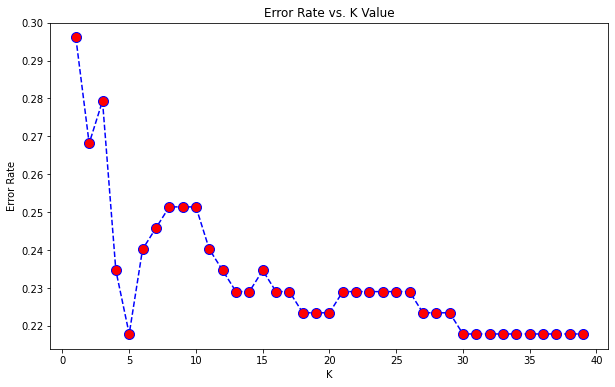

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')  # title
plt.xlabel('K')                      #X-label
plt.ylabel('Error Rate')             #y-label

In [ ]:
# # The elbow method compares the amount of variance against the number of clusters.
# # Not enough clusters lead to too much variance, while too many clusters lead to overfitting. 
# # After k is 5, the decrease is not steep, so choose 5
# # https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6
# # https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
# # mms = MinMaxScaler()
# mms = StandardScaler()
# mms.fit(data)
# data_transformed = mms.transform(data)

In [ ]:
# Sum_of_squared_distances = []
# K = range(1,15)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(data_transformed)
#     Sum_of_squared_distances.append(km.inertia_)

In [ ]:
# plt.plot(K, Sum_of_squared_distances, marker='o')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

## Use Euclidean distance.[3 points]

In [ ]:
# We need to scale our training and test set to make sure that they have a standard difference in them
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)
# It's time to make a classifier using the KNN algorithm
# https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean') 
# classifier.fit(X_train, y_train)
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) 
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Test the classifier with three diferent numbers for neighbors and record the results

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1]


## Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. Plot the Error rate vs. K-value
  - we plot the Error rate vs. K-value in the above


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("The confusion matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The accuracy scor")
ac = accuracy_score(y_test, y_pred)
print(ac)

The confusion matrix
[[91 26]
 [15 47]]
The accuracy scor
0.770949720670391


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
classes = ['0','1']
def plot_confusionmatrix(y_test, y_pred):
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

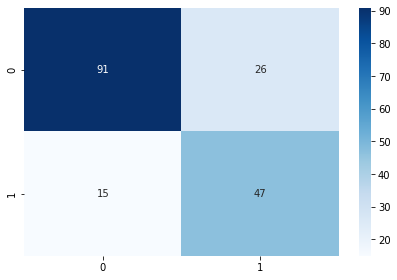

In [ ]:
plot_confusionmatrix(y_test, y_pred)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       117
           1       0.64      0.76      0.70        62

    accuracy                           0.77       179
   macro avg       0.75      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179



## Plot the classifier in a 2D projection
- https://www.aionlinecourse.com/tutorial/machine-learning/k-nearest-neighbor

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


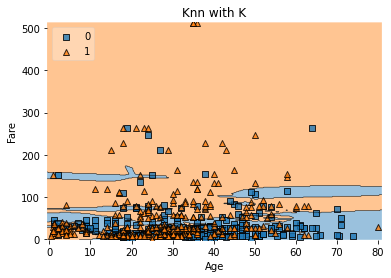

In [ ]:
from mlxtend.plotting import plot_decision_regions
# https://anaconda.org/conda-forge/mlxtend

#

def knn_comparision(X,y,k):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X, y)
  plot_decision_regions(X, y, clf=clf, legend=2)



#2-D plot for Age and fare
knn_comparision(data[['Age','Fare']].values,data['Survived'].astype(int).values, 5)

#knn_comparision(data[['Sex','Fare']].values,data['Survived'].astype(int).values, 5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Knn with K')
plt.show()


# Report (22 Points)

For each classification task you need to submit a report (PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations in 4 - 5 lines. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## Describe the Nearest Neighbors method. [5 points]
  - K-Nearest Neighbors is the supervised machine learning algorithm used for classification and regression. 
  - It manipulates the training data and classifies the new test data based on distance metrics. 
  - It finds the k-nearest neighbors to the test data, and then classification is performed by the majority of class labels.
  - K is the hyper parameter in KNN.
  - If K value is very less our model undefits and if K value is very high(lets say K = length of dataset) then our model will overfit.
  - In KNN for each datapoint we calculate distance to all other datapoints and among these we choose K nearest neighbors. Hence at all times entire dataset has to be present in the RAM which makes KNN computationally expensive.

# Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? [7 points]

## About the data set:

<b>Survived: </b> Indicates whether the passenger has survived or not. 1 indicates survived, 0 indicates not survived<br>
<b>Pclass: </b> Indicates the passenger class 1st, 2nd, 3rd<br>
<b>Name: </b> Indicates the name of the passenger<br>
<b>Sex: </b> Sex of the passenger<br>
<b>Age: </b> Age of the passenger<br>
<b>SibSp: </b> Number of siblings/spouses aboard<br>
<b>Parch: </b> Number of parents/children aboard<br>
<b>Ticket: </b> Ticket number<br>
<b>Fare: </b> Fare of the ticket<br>
<b>Cabin: </b> Cabin number<br>
<b>Embarked: </b> Port of Embarkation ( C = Cherbourg; Q = Queenstown; S = Southhampton)

we chose sex, age and fare as 3 best attributes for KNN model. If fare is high then there are high chances that 
the person may survuve because safety increases as fare value increases. Survival rate depends on age
and we chose gender because almost 64% of the people who did not survive are males.

Name and Ticket Number attributes are not useful. we will choose Pclass, cabin number and Embarked as other three attributes.


# Visualizations of the classifier in a 2D projection, and write your observations in 4 - 5 lines. [5 points]

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


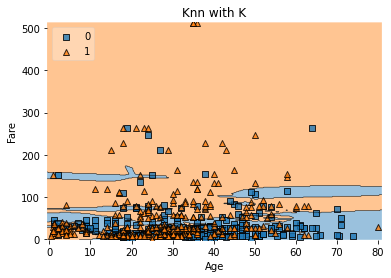

In [ ]:
# https://anaconda.org/conda-forge/mlxtend
# plotting 2D plot for optimal value of K which is 5

def knn_comparision(X,y,k):
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X, y)
  plot_decision_regions(X, y, clf=clf, legend=2)



#2-D plot for Age and fare
knn_comparision(data[['Age','Fare']].values,data['Survived'].astype(int).values, 5)

#knn_comparision(data[['Sex','Fare']].values,data['Survived'].astype(int).values, 5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Knn with K')
plt.show()

1. The above 2D plot is between Fare attribute and age attribute
2. Blue rectangles are the datapoints which are classified as not survivied. (survived=0) 
3. Orange rectangles are the datapoints which are classified as survived (survived = 1)
4. We can also see the decision surface separating rectangles and triangles(with k=5)

# Interprete and compare the results.[5 points]

```txt
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       117
           1       0.58      0.73      0.65        62

    accuracy                           0.73       179
   macro avg       0.71      0.73      0.71       179
weighted avg       0.75      0.73      0.73       179
```
- With optimal value of K which is 3 the accuracy of KNN model is 73%

```txt
                precision    recall  f1-score   support

           0       0.86      0.78      0.82       117
           1       0.64      0.76      0.70        62

    accuracy                           0.77       179
   macro avg       0.75      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179
```
- With optimal value of K which is 5 the accuracy of KNN model is 77%.

```txt
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       117
           1       0.61      0.69      0.65        62

    accuracy                           0.74       179
   macro avg       0.71      0.73      0.72       179
weighted avg       0.75      0.74      0.74       179
```
- With optimal value of K which is 7 the accuracy of KNN model is 74%


- Therefore, k = 5 has the highest accuracy than k = 3 and k = 7      


## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>